In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

In [2]:
df = pd.read_csv(r"C:\Users\vineet\Desktop\Pyhtonshit\DailyClassroomNotes\Polynomial_Regression\emp_sal.csv")
df.head()

,Position,Level,Salary
0,Jr Software Engineer,1,45000
1,Sr Software Engineer,2,50000
2,Team Lead,3,60000
3,Manager,4,80000
4,Sr manager,5,110000


In [3]:
x = df.iloc[:,1].to_frame()
y = df.iloc[:,-1].to_frame()

In [4]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(x,y)

LinearRegression()

Text(0.5, 0, 'Level')

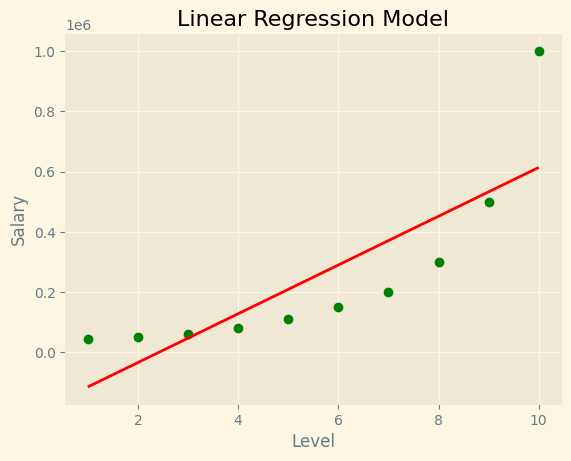

In [5]:
plt.scatter(x,y, color = "green")
plt.plot(x, model_1.predict(x), color = "red")
plt.title("Linear Regression Model")
plt.ylabel("Salary")
plt.xlabel("Level")

Clearly this model don't fit. If you try to predict any value, say for a person with 7.5 years of exp what will be the salary ?


In [6]:

model_1.predict([[5.5]])[0][0]

c:\Users\vineet\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(249500.0)

In [7]:
df

,Position,Level,Salary
0,Jr Software Engineer,1,45000
1,Sr Software Engineer,2,50000
2,Team Lead,3,60000
3,Manager,4,80000
4,Sr manager,5,110000
5,Region Manager,6,150000
6,AVP,7,200000
7,VP,8,300000
8,CTO,9,500000
9,CEO,10,1000000


Level 5 salary is 110K and level 6 salary is 150k, but our model predicts level 5.5 salary as 250K which is clearly wrong.

In [8]:
m = model_1.coef_
c = model_1.intercept_


#Salary of a person with 5.5 years of exp

prediction = m * 5.5 + c
prediction[0][0]

np.float64(249500.0)

## Polynomial Regression

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
x_poly = poly.fit_transform(x)
x_poly


array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [10]:
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_poly, y)

LinearRegression()

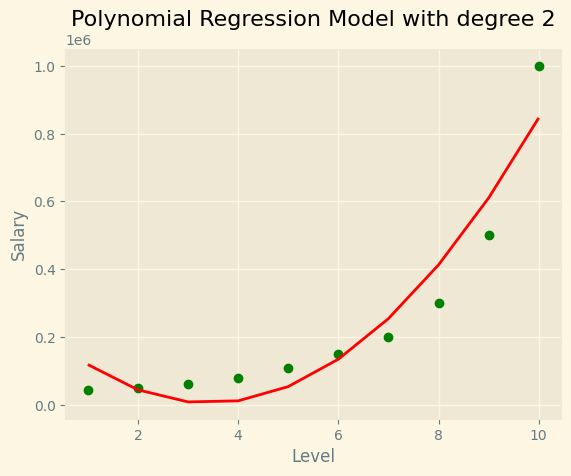

In [11]:
plt.scatter(x,y, color = "green")
plt.plot(x, poly_reg_model.predict(x_poly), color = "red")
plt.title("Polynomial Regression Model with degree 2")
plt.ylabel("Salary")
plt.xlabel("Level")
plt.show()

In [12]:
poly_reg_model.predict(poly.fit_transform([[5.5]]))[0][0]

np.float64(89187.49999999988)

Level 5 salary is 110K and level 6 salary is 150k, but our model predicts level 5.5 salary as 89K which is still not satisfactory

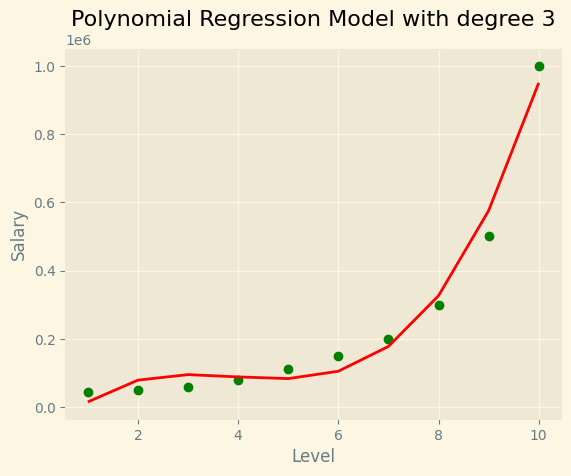

In [13]:
#Polynomial with higher degrees

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_poly, y)


plt.scatter(x,y, color = "green")
plt.plot(x, poly_reg_model.predict(x_poly), color = "red")
plt.title("Polynomial Regression Model with degree 3")
plt.ylabel("Salary")
plt.xlabel("Level")
plt.show()

In [14]:
poly_reg_model.predict(poly.fit_transform([[5.5]]))[0][0]

np.float64(89187.50000000221)

Again not satisfactory

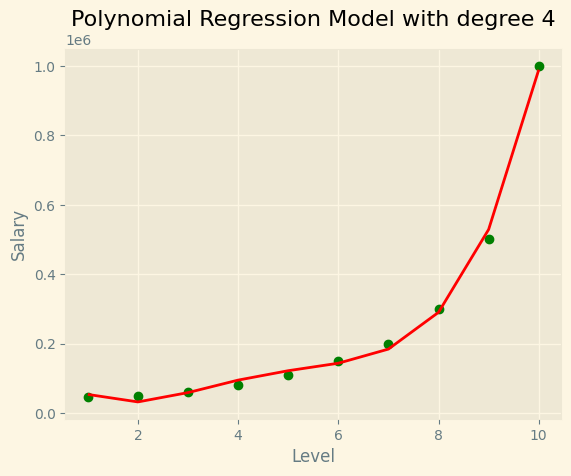

In [15]:
#Polynomial with higher degrees

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x)

from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_poly, y)


plt.scatter(x,y, color = "green")
plt.plot(x, poly_reg_model.predict(x_poly), color = "red")
plt.title("Polynomial Regression Model with degree 4")
plt.ylabel("Salary")
plt.xlabel("Level")
plt.show()

In [16]:
poly_reg_model.predict(poly.fit_transform([[5.5]]))[0][0]

np.float64(132148.43750002387)

Now it's good since predicted value is between 110k and 150k

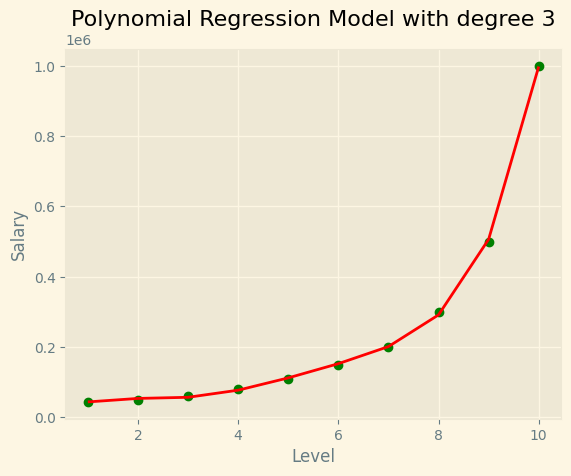

np.float64(132148.43750059872)

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
x_poly = poly.fit_transform(x)

from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_poly, y)


plt.scatter(x,y, color = "green")
plt.plot(x, poly_reg_model.predict(x_poly), color = "red")
plt.title("Polynomial Regression Model with degree 3")
plt.ylabel("Salary")
plt.xlabel("Level")
plt.show()

poly_reg_model.predict(poly.fit_transform([[5.5]]))[0][0]

Further fitting is not required